# amazon product review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import string

In [3]:
data=pd.read_csv("E:\Assisgnments\TextMining\B092YHJGMN - reviews.csv",error_bad_lines=False)

In [4]:
data.head()

,Title,Helpfull-statement,Username,Images,Rating,Creation-date,Review
0,My 12 Year Old Loves It!,-,april crawford,-,5,2020-08-06T12:59:17,This is a great entry gaming laptop for my 12 ...
1,Great Laptop but Check it all when it comes,2 people found this helpful,samantha samuelson,-,4,2020-09-17T17:59:17,I m definitely loving this laptop.I have a gam...
2,DOA,3 people found this helpful,Baseer,https://m.media-amazon.com/images/I/31lJsa37x3...,5,2020-04-15T17:59:17,Unfortunately the unit won t power on. I can ...
3,Advertised as Oculus 2 ready. Confirmed with A...,4 people found this helpful,Amazon Customer,-,1,2020-07-23T17:59:17,I got this because Acer told me this was compa...
4,Be wary of keyboard,2 people found this helpful,Ross,-,1,2020-06-27T11:59:17,I am a 66yr old man with Red/Green colour blin...


In [6]:
data=data.drop(columns={"Title","Helpfull-statement","Username","Images","Rating","Creation-date"})

In [7]:
data.head()

,Review
0,This is a great entry gaming laptop for my 12 ...
1,I m definitely loving this laptop.I have a gam...
2,Unfortunately the unit won t power on. I can ...
3,I got this because Acer told me this was compa...
4,I am a 66yr old man with Red/Green colour blin...


# TEST PREPROCESSING

In [8]:
#for removing leading and trailing charecter
data=[Review.strip() for Review in data.Review]

In [9]:
#removing empty string 
data=[Review for Review in data if Review]

In [10]:
data[0:20]

['This is a great entry gaming laptop for my 12 year old who will be 13 next month. The colors and graphics are great  he loves the lighted keyboard  and this definitely has a bit of weight which contributes to the sturdiness. I also like that it s also just a great laptop as well. We were able to upgrade for Windows 11 for free. At home  he now uses this computer vs the school assigned Chrome  for his Zoom math tutoring sessions (the camera and microphone is decent we still use a separate microphone)  and to also complete his homework on Google classroom.Other features: I also like the number of inputs which has more than my Lenovo X1 Carbon ThinkPad  and the ability to wirelessly connect the laptop to your tv as a second extended screen is pretty cool.Overall this was a present for his good grades  and it also works great for homework assignments and video conferencing as added bonuses.',
 'I m definitely loving this laptop.I have a gaming rig with a Ryzen 5 3rd gen and XFX main card

In [11]:
#joining the data into text
data_text=' '.join(data)
data_text

'This is a great entry gaming laptop for my 12 year old who will be 13 next month. The colors and graphics are great  he loves the lighted keyboard  and this definitely has a bit of weight which contributes to the sturdiness. I also like that it s also just a great laptop as well. We were able to upgrade for Windows 11 for free. At home  he now uses this computer vs the school assigned Chrome  for his Zoom math tutoring sessions (the camera and microphone is decent we still use a separate microphone)  and to also complete his homework on Google classroom.Other features: I also like the number of inputs which has more than my Lenovo X1 Carbon ThinkPad  and the ability to wirelessly connect the laptop to your tv as a second extended screen is pretty cool.Overall this was a present for his good grades  and it also works great for homework assignments and video conferencing as added bonuses. I m definitely loving this laptop.I have a gaming rig with a Ryzen 5 3rd gen and XFX main card  and

In [12]:
#remove punctuation mark
no_punc = data_text.translate(str.maketrans('','',string.punctuation))
no_punc

'This is a great entry gaming laptop for my 12 year old who will be 13 next month The colors and graphics are great  he loves the lighted keyboard  and this definitely has a bit of weight which contributes to the sturdiness I also like that it s also just a great laptop as well We were able to upgrade for Windows 11 for free At home  he now uses this computer vs the school assigned Chrome  for his Zoom math tutoring sessions the camera and microphone is decent we still use a separate microphone  and to also complete his homework on Google classroomOther features I also like the number of inputs which has more than my Lenovo X1 Carbon ThinkPad  and the ability to wirelessly connect the laptop to your tv as a second extended screen is pretty coolOverall this was a present for his good grades  and it also works great for homework assignments and video conferencing as added bonuses I m definitely loving this laptopI have a gaming rig with a Ryzen 5 3rd gen and XFX main card  and this lapto

In [13]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Simran
[nltk_data]     Shaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc)
print(text_tokens)


['This', 'is', 'a', 'great', 'entry', 'gaming', 'laptop', 'for', 'my', '12', 'year', 'old', 'who', 'will', 'be', '13', 'next', 'month', 'The', 'colors', 'and', 'graphics', 'are', 'great', 'he', 'loves', 'the', 'lighted', 'keyboard', 'and', 'this', 'definitely', 'has', 'a', 'bit', 'of', 'weight', 'which', 'contributes', 'to', 'the', 'sturdiness', 'I', 'also', 'like', 'that', 'it', 's', 'also', 'just', 'a', 'great', 'laptop', 'as', 'well', 'We', 'were', 'able', 'to', 'upgrade', 'for', 'Windows', '11', 'for', 'free', 'At', 'home', 'he', 'now', 'uses', 'this', 'computer', 'vs', 'the', 'school', 'assigned', 'Chrome', 'for', 'his', 'Zoom', 'math', 'tutoring', 'sessions', 'the', 'camera', 'and', 'microphone', 'is', 'decent', 'we', 'still', 'use', 'a', 'separate', 'microphone', 'and', 'to', 'also', 'complete', 'his', 'homework', 'on', 'Google', 'classroomOther', 'features', 'I', 'also', 'like', 'the', 'number', 'of', 'inputs', 'which', 'has', 'more', 'than', 'my', 'Lenovo', 'X1', 'Carbon', 'Th

In [15]:
#token count
len(text_tokens)

24233

In [16]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','�']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['This', 'great', 'entry', 'gaming', 'laptop', '12', 'year', 'old', '13', 'next', 'month', 'The', 'colors', 'graphics', 'great', 'loves', 'lighted', 'keyboard', 'definitely', 'bit', 'weight', 'contributes', 'sturdiness', 'also', 'like', 'also', 'great', 'laptop', 'well', 'We', 'able', 'upgrade', 'Windows', '11', 'free', 'At', 'home', 'uses', 'computer', 'vs', 'school', 'assigned', 'Chrome', 'Zoom', 'math', 'tutoring', 'sessions', 'camera', 'microphone', 'decent', 'still', 'use', 'separate', 'microphone', 'also', 'complete', 'homework', 'Google', 'classroomOther', 'features', 'also', 'like', 'number', 'inputs', 'Lenovo', 'X1', 'Carbon', 'ThinkPad', 'ability', 'wirelessly', 'connect', 'laptop', 'tv', 'second', 'extended', 'screen', 'pretty', 'coolOverall', 'present', 'good', 'grades', 'also', 'works', 'great', 'homework', 'assignments', 'video', 'conferencing', 'added', 'bonuses', 'definitely', 'loving', 'laptopI', 'gaming', 'rig', 'Ryzen', '5', '3rd', 'gen', 'XFX', 'main', 'card', 'lapt

In [17]:
len(no_stop_tokens)

13418

In [18]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['main', 'card', 'laptop', 'holds', 'aaa', 'titles', 'play', 'big', 'rig', 'but', 'take', 'anywherethe', 'reason', 'gets', '4', 'star', 'clearly', 'states', 'supposed', '2', 'stick', 'pcie', 'ssd', 'slots', '25', 'hdd', 'port', 'upgrade', 'storagewhen', 'popped', 'bugger', 'open', 'add', 'storage', 'ram', 'low', 'behold', 'find', '1', 'stick', 'ssd', 'slots', '25', 'luckily', 'bought', '25', 'ssd', 'instead', 'stick', 'pcie', 'since', 'thing', 'clearly', 'spot', 'mb', 'extra', 'pcie', 'slot', 'nothing', 'so', 'basically', 'get', '1', 'pcie', '1', '25', 'hdd', 'port', 'instead', '2super', 'disappointed', 'considering', 'even', 'nitro', '5', 'sticker', 'says', 'available', 'slots', '2', 'ssd', '1', 'hdd', 'unfortunately', 'true', 'unfortunately', 'unit', 'power', 'tell', 'laptop', 'bad', 'power', 'supplyupdate', 'user', 'error', 'plugging', 'power', 'cord', 'way', 'seen']


In [19]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

this great entry gaming laptop 12 year old 13 next month the colors graphics great loves lighted keyboard definitely bit weight contributes sturdiness also like also great laptop well we able upgrade windows 11 free at home uses computer vs school assigned chrome zoom math tutoring sessions camera microphone decent still use separate microphone also complete homework google classroomother features also like number inputs lenovo x1 carbon thinkpad ability wirelessly connect laptop tv second extended screen pretty cooloverall present good grades also works great homework assignments video conferencing added bonuses definitely loving laptopi gaming rig ryzen 5 3rd gen xfx main card laptop holds aaa titles play big rig but take anywherethe reason gets 4 star clearly states supposed 2 stick pcie ssd slots 25 hdd port upgrade storagewhen popped bugger open add storage ram low behold find 1 stick ssd slots 25 luckily bought 25 ssd instead stick pcie since thing clearly spot mb extra pcie slot

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['this', 'great', 'entry', 'gaming', 'laptop', '12', 'year', 'old', '13', 'next', 'month', 'the', 'color', 'graphic', 'great', 'love', 'lighted', 'keyboard', 'definitely', 'bit', 'weight', 'contribute', 'sturdiness', 'also', 'like', 'also', 'great', 'laptop', 'well', 'we', 'able', 'upgrade', 'window', '11', 'free', 'at', 'home', 'use', 'computer', 'vs', 'school', 'assign', 'chrome', 'zoom', 'math', 'tutoring', 'session', 'camera', 'microphone', 'decent', 'still', 'use', 'separate', 'microphone', 'also', 'complete', 'homework', 'google', 'classroomother', 'feature', 'also', 'like', 'number', 'inputs', 'lenovo', 'x1', 'carbon', 'thinkpad', 'ability', 'wirelessly', 'connect', 'laptop', 'tv', 'second', 'extended', 'screen', 'pretty', 'cooloverall', 'present', 'good', 'grade', 'also', 'work', 'great', 'homework', 'assignment', 'video', 'conference', 'add', 'bonus', 'definitely', 'love', 'laptopi', 'game', 'rig', 'ryzen', '5', '3rd', 'gen', 'xfx', 'main', 'card', 'laptop', 'hold', 'aaa', 'ti

In [21]:
clean_Review=' '.join(lemmas)
clean_Review

'this great entry gaming laptop 12 year old 13 next month the color graphic great love lighted keyboard definitely bit weight contribute sturdiness also like also great laptop well we able upgrade window 11 free at home use computer vs school assign chrome zoom math tutoring session camera microphone decent still use separate microphone also complete homework google classroomother feature also like number inputs lenovo x1 carbon thinkpad ability wirelessly connect laptop tv second extended screen pretty cooloverall present good grade also work great homework assignment video conference add bonus definitely love laptopi game rig ryzen 5 3rd gen xfx main card laptop hold aaa title play big rig but take anywherethe reason get 4 star clearly state suppose 2 stick pcie ssd slot 25 hdd port upgrade storagewhen pop bugger open add storage ram low behold find 1 stick ssd slot 25 luckily buy 25 ssd instead stick pcie since thing clearly spot mb extra pcie slot nothing so basically get 1 pcie 1 

# FEATURE EXTRACTION

# USING TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [24]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '1000', '1080p', '144', '144hz', '16', '25', '256', '2933', '30', '3050', '32', '3d', '60', '80', '800', 'able', 'ac', 'acer', 'actually', 'adapter', 'add', 'additional', 'after', 'al', 'almost', 'already', 'also', 'always', 'amazing', 'amazon', 'amount', 'and', 'another', 'anything', 'around', 'arrival', 'arrive', 'average', 'away', 'awesome', 'back', 'backlight', 'bad', 'base', 'basically', 'battery', 'be', 'big', 'bio', 'bit', 'black', 'bottom', 'box', 'brand', 'break', 'bright', 'brightness', 'bring', 'buck', 'budget', 'buena', 'build', 'business', 'but', 'button', 'buy', 'cable', 'call', 'can', 'capable', 'card', 'case', 'certain', 'change', 'channel', 'charge', 'charger', 'cheap', 'check', 'chip', 'choice', 'christmas', 'click', 'color', 'come', 'company', 'compare', 'complaint', 'computer', 'con', 'connector', 'cool', 'cord', 'core', 'could', 'couple', 'cpu', 'current', 'damage', 'dark', 'day', 'ddr4', 'de', 'dead', 'deal', 'decent', 'decide', 'defective', 'definit

# Ganerate wordcloud

In [25]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud

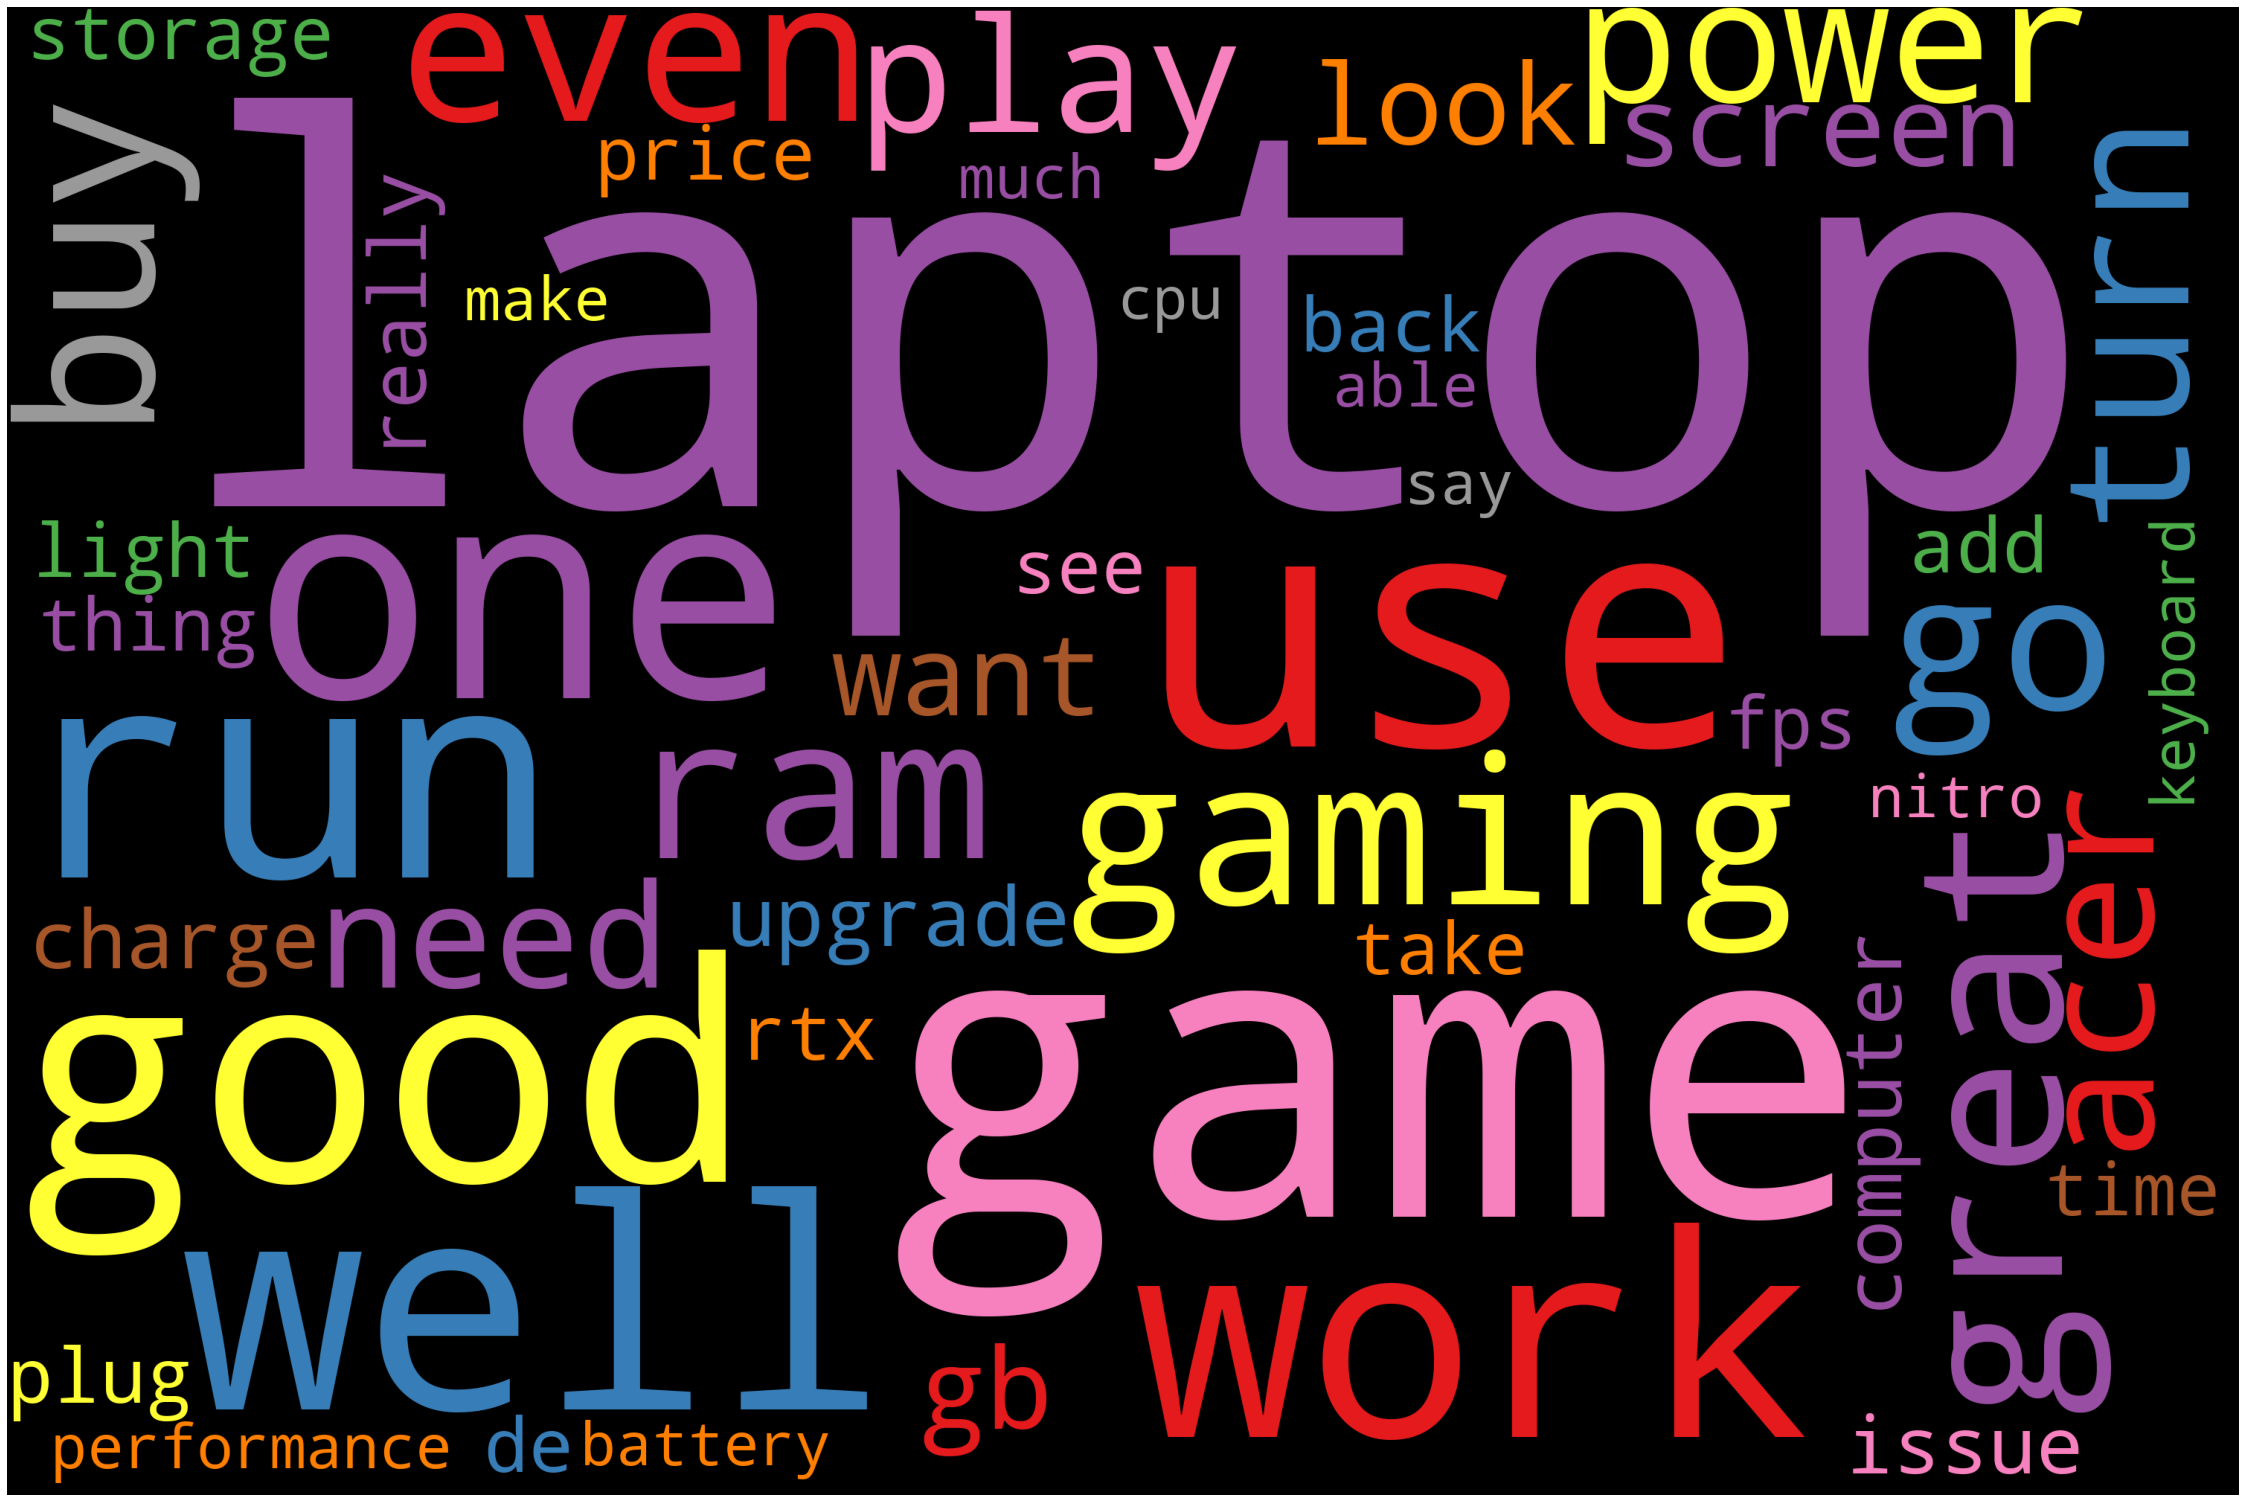

In [26]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_Review)
plot_cloud(wordcloud)

# NAMED ENTITY RECOGNITIOON

In [27]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_Review
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[100:200]:
    print(token,token.pos_)

main ADJ
card NOUN
laptop NOUN
hold VERB
aaa PROPN
title NOUN
play VERB
big ADJ
rig NOUN
but CCONJ
take VERB
anywherethe DET
reason NOUN
get VERB
4 NUM
star NOUN
clearly ADV
state NOUN
suppose VERB
2 NUM
stick PROPN
pcie NOUN
ssd NOUN
slot NOUN
25 NUM
hdd NOUN
port NOUN
upgrade NOUN
storagewhen NOUN
pop NOUN
bugger NOUN
open ADJ
add VERB
storage NOUN
ram NOUN
low ADV
behold ADJ
find NOUN
1 NUM
stick PROPN
ssd NOUN
slot NOUN
25 NUM
luckily ADV
buy VERB
25 NUM
ssd NOUN
instead ADV
stick VERB
pcie NOUN
since SCONJ
thing NOUN
clearly ADV
spot VERB
mb X
extra ADJ
pcie NOUN
slot NOUN
nothing PRON
so ADV
basically ADV
get VERB
1 NUM
pcie NOUN
1 NUM
25 NUM
hdd NOUN
port NOUN
instead ADV
2super NUM
disappoint NOUN
consider VERB
even ADV
nitro VERB
5 NUM
sticker NOUN
say VERB
available ADJ
slot NOUN
2 NUM
ssd NOUN
1 NUM
hdd NOUN
unfortunately ADV
true ADJ
unfortunately ADV
unit NOUN
power NOUN
tell VERB
laptop NOUN
bad ADJ
power NOUN
supplyupdate NOUN
user NOUN
error NOUN
plugging NOUN
power NOU

In [29]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['tell', 'laptop', 'power', 'supplyupdate', 'user', 'error', 'plugging', 'power', 'cord', 'way', 'see', 'picture', 'get', 'acer', 'tell', 'oculus', 'receive', 'contact', 'acer', 'support', 'tell', 'need', 'purchase', 'model', 'mb', 'memory', 'sale', 'tell', 'thing', 'support', 'tell', 'get', 'model', 'work', 'man', 'redgreen', 'colour', 'blindness', 'keyboard', 'read', 'brightness', 'send', 'dude', 'problem', 'learn', 'menu', 'turn', 'light', 'see', 'stay', 'goodness', 'order', 'laptop', 'arrive', 'find', 'charge', 'port', 'notice', 'representative', 'buy', 'confirm', 'prong', 'port', 'talk', 'amazon', 'rep', 'send', 'replacement', 'get', 'laptop', 'defect', 'say', 'stay', 'look', 'use', 'laptop', 'use', 'trial', 'amazon', 'saving', 'get', 'vacation', 'work', 'get', 'laptop', 'kill', 'cut', 'model', 'nitro', 'allaround', 'lot', 'room', 'expand', 'storageram', 'keyboard', 'performance', 'play', 'game', 'setting', 'fpsthe']


In [30]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,laptop,306
1,game,154
2,get,138
3,gaming,93
4,use,92
5,run,74
6,power,70
7,work,66
8,ram,61
9,go,56


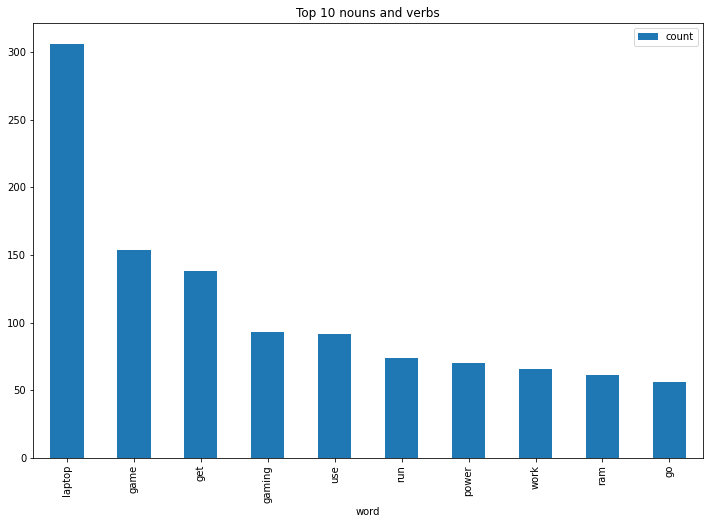

In [31]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion mining sentiment analysis

In [32]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))
sentences

['This is a great entry gaming laptop for my 12 year old who will be 13 next month.',
 'The colors and graphics are great  he loves the lighted keyboard  and this definitely has a bit of weight which contributes to the sturdiness.',
 'I also like that it s also just a great laptop as well.',
 'We were able to upgrade for Windows 11 for free.',
 'At home  he now uses this computer vs the school assigned Chrome  for his Zoom math tutoring sessions (the camera and microphone is decent we still use a separate microphone)  and to also complete his homework on Google classroom.Other features: I also like the number of inputs which has more than my Lenovo X1 Carbon ThinkPad  and the ability to wirelessly connect the laptop to your tv as a second extended screen is pretty cool.Overall this was a present for his good grades  and it also works great for homework assignments and video conferencing as added bonuses.',
 'I m definitely loving this laptop.I have a gaming rig with a Ryzen 5 3rd gen a

In [33]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df


,sentence
0,This is a great entry gaming laptop for my 12 ...
1,The colors and graphics are great he loves th...
2,I also like that it s also just a great laptop...
3,We were able to upgrade for Windows 11 for free.
4,At home he now uses this computer vs the scho...
...,...
1104,I have read the bad reviews and decided to go ...
1105,Actually u just need to press the adaptor har...
1106,Once done u can run it on battery or charger.
1107,It will not turn on probably to save the batte...


In [34]:
# Emotion Lexicon - Affin
afinn=pd.read_csv('E:\Assisgnments\TextMining\Afinn.csv',sep=',',encoding='Latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [35]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [36]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
#nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [37]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [38]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [39]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     18
1     24
2     13
3     10
4     97
5    130
6     36
7      7
8     20
9     29
Name: word_count, dtype: int64

In [40]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
369,He uses it every day and loves it Says it is ...,9,16
1033,Bought this as a Christmas gift for my oldest ...,10,40
797,The casing for this device is strong even thou...,10,61
662,This seemed like a great compromise between ne...,11,25
504,for games I was able to play Planetside 2 at a...,12,65
322,for games I was able to play Planetside 2 at a...,12,65
622,Great entry level gaming pc It runs great able...,13,49
4,At home he now uses this computer vs the scho...,13,97
886,The fans are most certainly there but nowhere ...,13,107
238,My only other complaint besides the battery is...,15,93


In [41]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1109.000000
mean        1.141569
std         2.758769
min        -8.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        15.000000
Name: sentiment_value, dtype: float64

In [42]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
6,So basically I get 1 PCIE and 1 2.5 HDD port ...,-2,36
8,I can t tell if it s the laptop itself or if i...,-5,20
9,I wasn t plugging in the power cord all the wa...,0,29
10,When I received it it was not compatible.,0,8
14,I got the better model at $1400.,0,7


In [43]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
4,At home he now uses this computer vs the scho...,13,97
238,My only other complaint besides the battery is...,15,93
322,for games I was able to play Planetside 2 at a...,12,65
504,for games I was able to play Planetside 2 at a...,12,65
622,Great entry level gaming pc It runs great able...,13,49


C:\Users\Simran Shaikh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

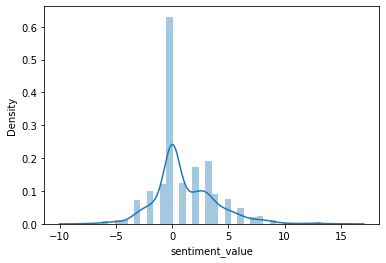

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

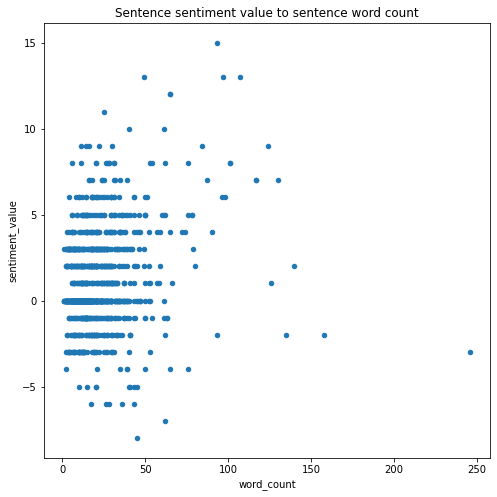

In [45]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')